In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('exams.csv')
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Set seaborn style theme

Parameters:
[Seaborn link](https://seaborn.pydata.org/generated/seaborn.set_theme.html)

- **context**: changes label size, line thickness, etc  
  options: 'paper', 'notebook', 'talk', 'poster'

- **style**: changes plot styles  
  options: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'

- **palette**: Choose color palette
  options: 'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind'

- **rc**: Dictionary of rc parameter mappings to override

In [ ]:
# default
sns.set_theme()
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# custom example
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='paper', style='darkgrid', palette='Pastel1', font='century gothic', rc=custom_params)

## Axes-level

Seaborn has two ways of functions to plot. **Figure-level** function generates `seaborn.FacetGrid` object and **Axes-level** function generate `matplotlib.pyplot.Axes` object.  
For better control, it is better to use **Axes-level** functions.  
![image](https://seaborn.pydata.org/_images/function_overview_8_0.png)


## Basic plots

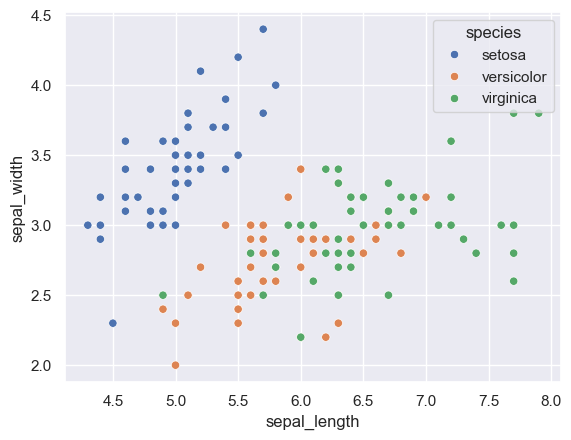

In [5]:
# scatterplot
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.show()

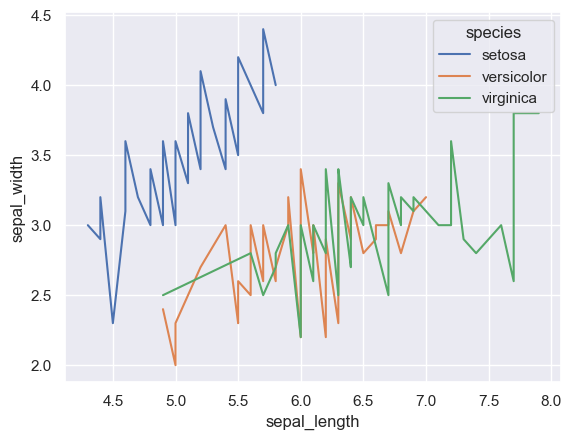

In [6]:
# lineplot
sns.lineplot(data=df, x='sepal_length', y='sepal_width', hue='species', estimator=None)
plt.show()

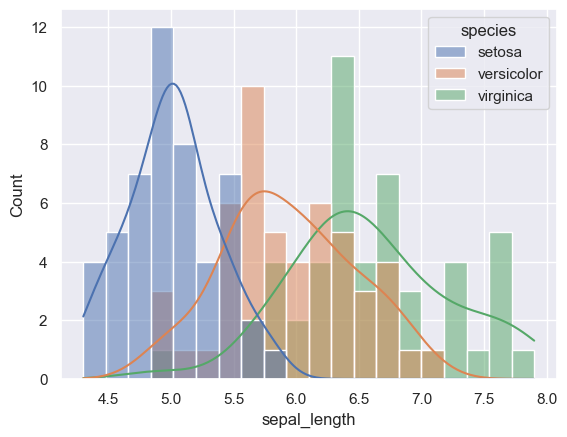

In [7]:
# histplot
sns.histplot(data=df, x='sepal_length', hue='species', stat='count', bins=20, kde=True)
plt.show()

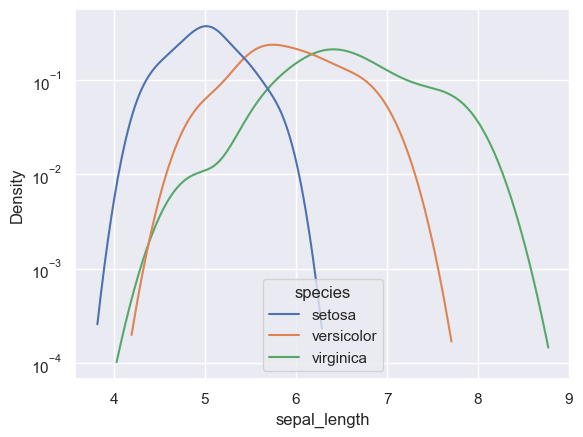

In [8]:
# kdeplot
sns.kdeplot(data=df, x='sepal_length', hue='species', log_scale=(False,True))
plt.show()

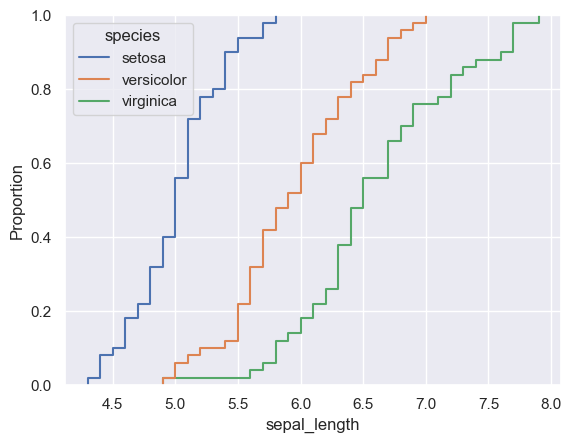

In [9]:
# ecdfplot
sns.ecdfplot(data=df, x='sepal_length', hue='species')
plt.show()

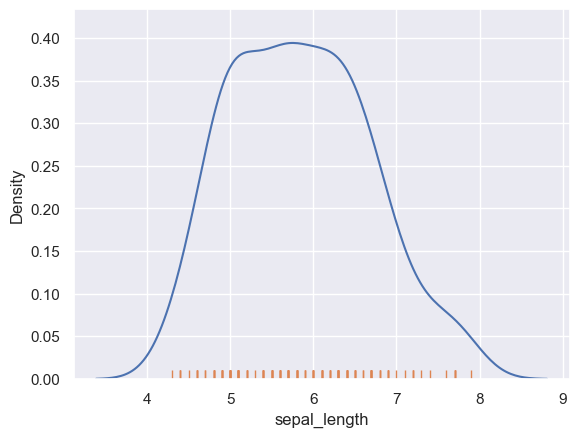

In [10]:
# rugplot
sns.kdeplot(data=df, x='sepal_length')
sns.rugplot(data=df, x='sepal_length')
plt.show()

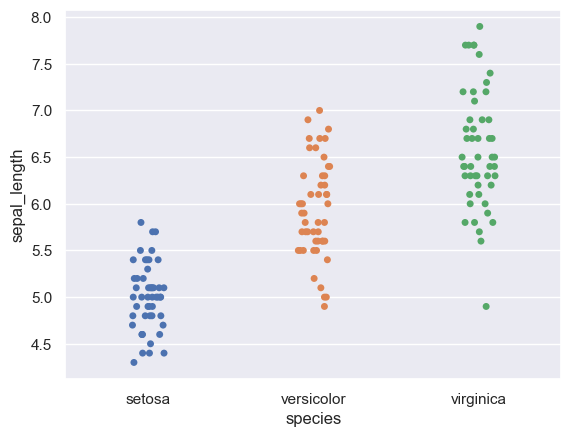

In [11]:
# stripplot
sns.stripplot(data=df, x='species', y='sepal_length', hue='species')
plt.show()

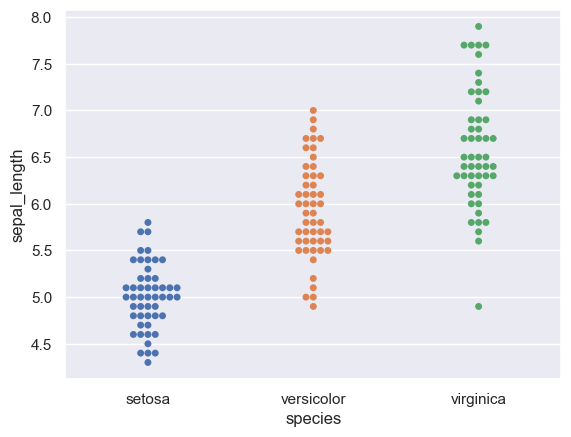

In [12]:
# swarmplot
sns.swarmplot(data=df, x='species', y='sepal_length', hue='species')
plt.show()

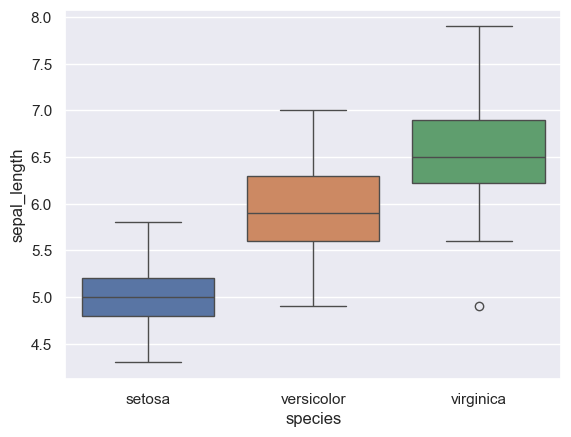

In [13]:
# boxplot
sns.boxplot(data=df, x='species', y='sepal_length', hue='species')
plt.show()

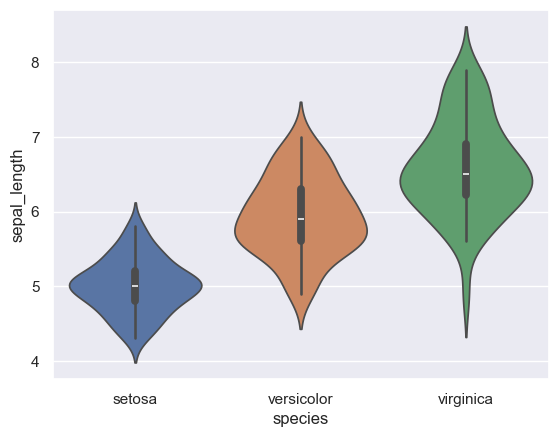

In [14]:
# violinplot
sns.violinplot(data=df, x='species', y='sepal_length', hue='species')
plt.show()

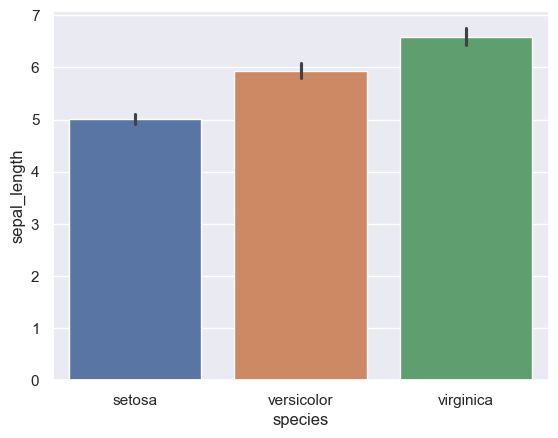

In [15]:
# barplot
sns.barplot(data=df, x='species', y='sepal_length', hue='species')
plt.show()

## Multiple plots in one axes

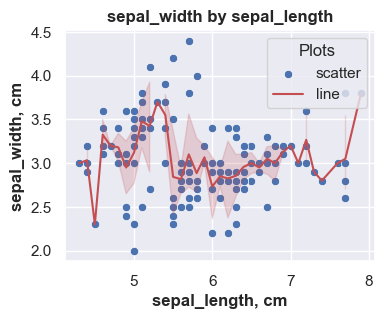

In [16]:
# create a single grid figure using plt.subplots - default size (width, height) is 6.4 and 4.8 inches
fig, ax = plt.subplots(figsize=(4,3))

# add sns plots to the axes
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', ax=ax, label='to be override')
sns.lineplot(data=df, x='sepal_length', y='sepal_width', color='r', ax=ax, label='to be override')

# add title, legend and label - will override sns plot parameters
ax.set_title('sepal_width by sepal_length', {'fontsize': 12, 'fontweight':'bold'})
ax.legend(title="Plots", labels=['scatter','line'])
ax.set_xlabel('sepal_length, cm', {'fontweight':'bold'})
ax.set_ylabel('sepal_width, cm', {'fontweight':'bold'})
# ax.set(xlabel='sepal_length, cm', ylabel='sepal_width, cm')

plt.show()

## Multiple plot in a figure

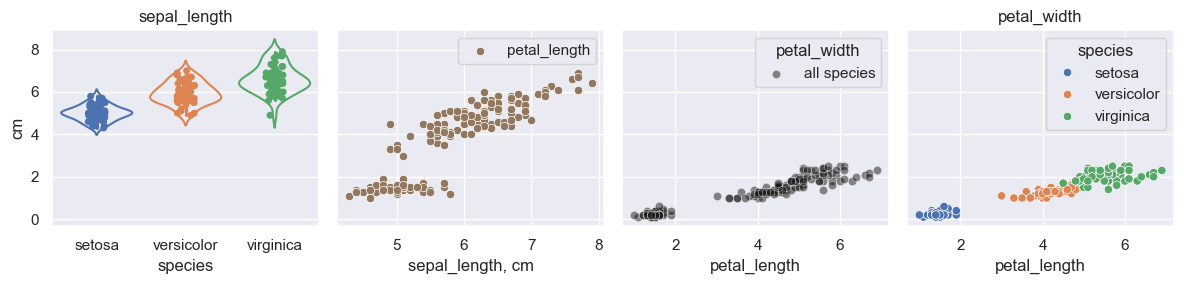

In [17]:
# create a grid using plt.subplots - default size (width, height) is 6.4 and 4.8 inches
fig, ax = plt.subplots(1,4,figsize=(12,3), sharey=True)

# first plot
sns.stripplot(ax=ax[0], data=df, x='species', y='sepal_length', hue='species')
sns.violinplot(ax=ax[0], data=df, x='species', y='sepal_length', hue='species', fill=False)
ax[0].set(ylabel='cm')
ax[0].set_title('sepal_length')

# second plot
sns.scatterplot(ax=ax[1], data=df, x='sepal_length', y='petal_length', color=sns.color_palette()[5])
ax[1].legend(labels=['petal_length'])
ax[1].set(xlabel='sepal_length, cm')

# third plot
sns.scatterplot(ax=ax[2], data=df, x='petal_length', y='petal_width', color='k', alpha = 0.5, label='all species')
ax[2].legend(title='petal_width', labels=['all species'])

# fourth plot
sns.scatterplot(ax=ax[3], data=df, x='petal_length', y='petal_width', hue='species')
ax[3].set_title('petal_width')

# adjust the padding between and around subplots.
plt.tight_layout()
plt.show()

## Matrix plot

[0,0] x=sepal_length y=sepal_length
[0,1] x=sepal_width y=sepal_length
[0,2] x=petal_length y=sepal_length
[0,3] x=petal_width y=sepal_length
[1,0] x=sepal_length y=sepal_width
[1,1] x=sepal_width y=sepal_width
[1,2] x=petal_length y=sepal_width
[1,3] x=petal_width y=sepal_width
[2,0] x=sepal_length y=petal_length
[2,1] x=sepal_width y=petal_length
[2,2] x=petal_length y=petal_length
[2,3] x=petal_width y=petal_length
[3,0] x=sepal_length y=petal_width
[3,1] x=sepal_width y=petal_width
[3,2] x=petal_length y=petal_width
[3,3] x=petal_width y=petal_width


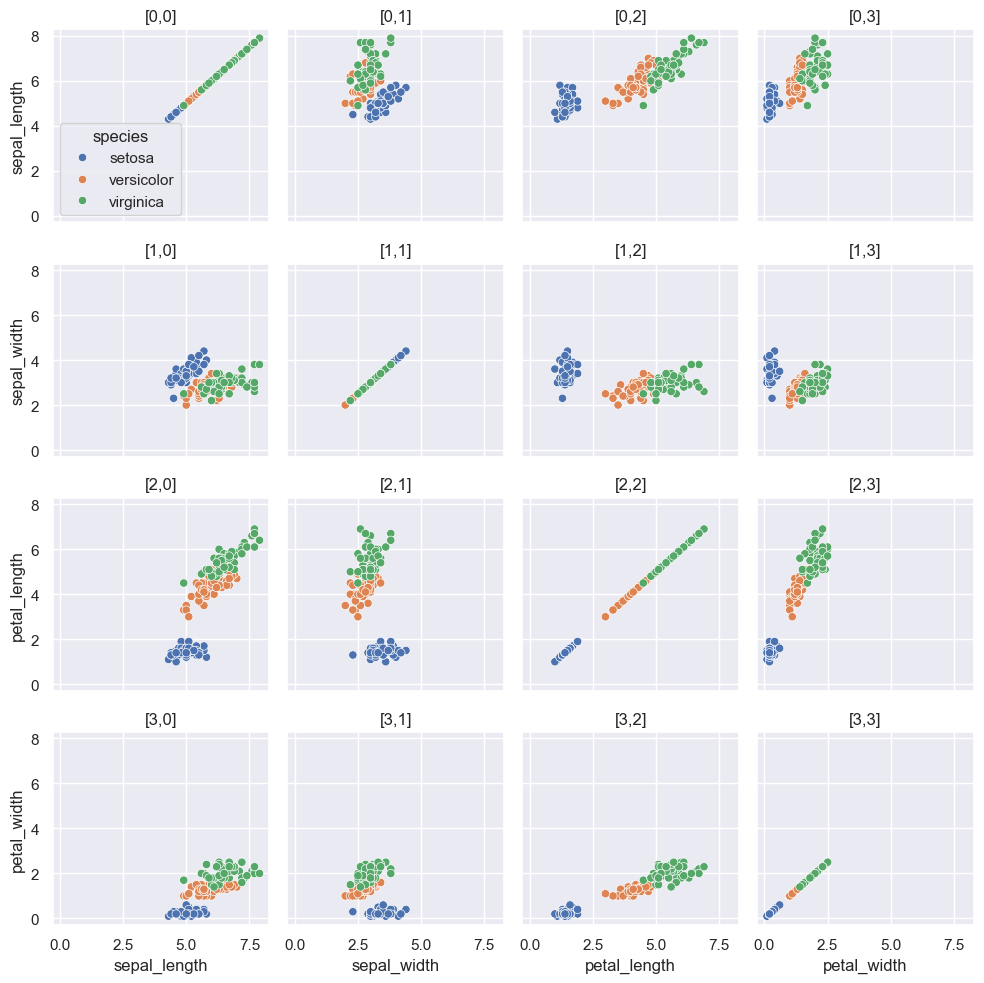

In [18]:
# create a grid using plt.subplots
fig, ax = plt.subplots(4,4,figsize=(10,10),sharex=True, sharey=True)

# generate matrix plot(pairplot in seaborn)
for row, col_y in enumerate(df.columns[0:4]):
    for col, col_x in enumerate(df.columns[0:4]):
        # generate legend at [0,0] plot
        if row==0 and col==0:
            sns.scatterplot(ax=ax[row,col], data=df, x=col_x, y=col_y, hue='species')
        else:
            sns.scatterplot(ax=ax[row,col], data=df, x=col_x, y=col_y, hue='species', legend=False)

        # optional location id
        ax[row,col].set_title(f"[{row},{col}]")
        # optional plot position and axis
        print(f"[{row},{col}]",f"x={col_x}", f"y={col_y}")
        
# adjust the padding between and around subplots.
plt.tight_layout()
plt.show()

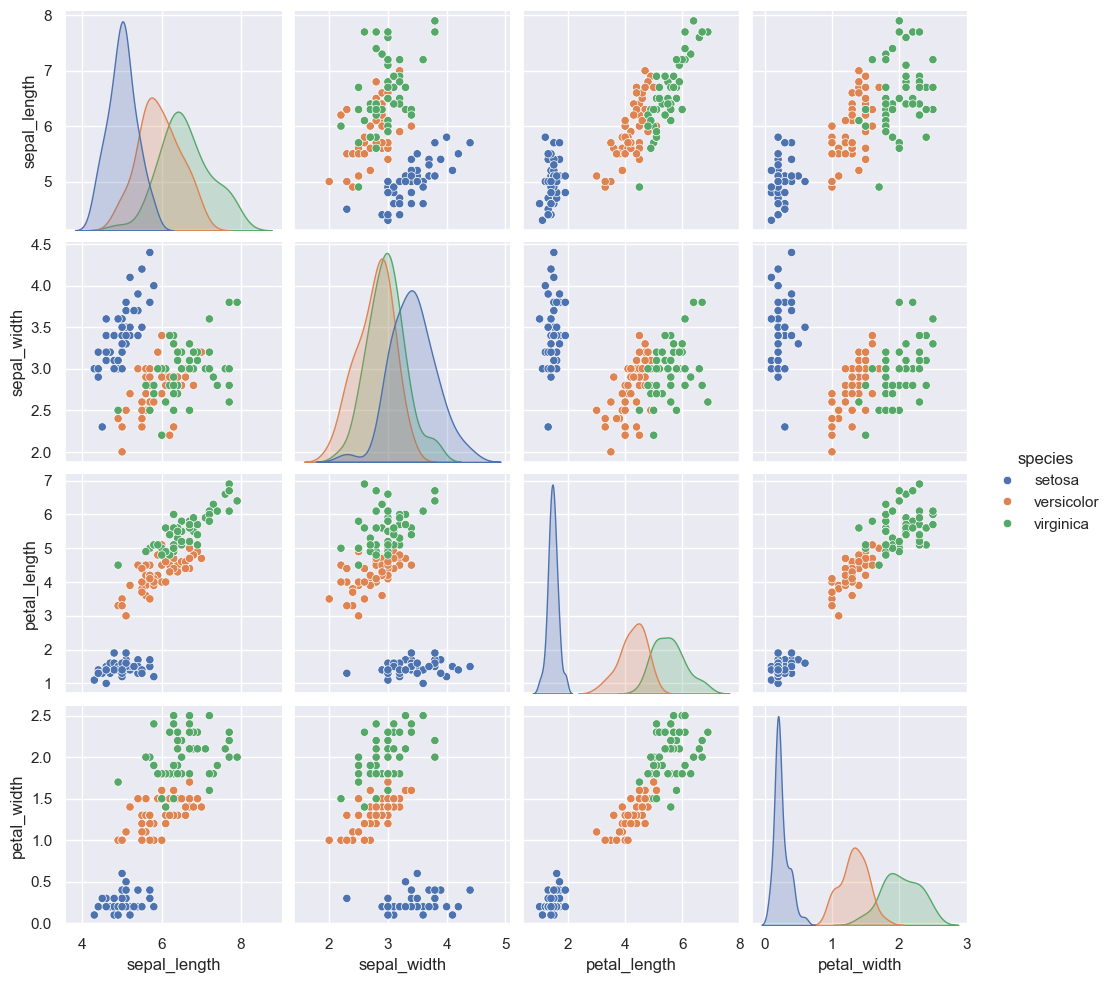

In [19]:
sns.pairplot(data=df, hue='species')
plt.show()

## Color palettes

There are two ways to set color palette.

In [ ]:
# set theme - default color palette is 'deep'
sns.set_theme(context='paper', style='white', palette='Set3', color_codes=True, font='century gothic')

# set color palette
sns.set_palette(palette='pastel', n_colors=None, desat=None, color_codes=False)

Possible palette values include:

- [Seaborn palette](https://seaborn.pydata.org/tutorial/color_palettes.html) ('deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind')

- [Matplotlib colormap](https://matplotlib.org/stable/gallery/color/colormap_reference.html)

- ‘husl’ or ‘hls’

color_codes: bool

- If `True` and `palette` is a seaborn palette, remap the [shorthand color codes](https://matplotlib.org/stable/gallery/color/named_colors.html#base-colors) (e.g. “b”, “g”, “r”, etc.) to the colors from this palette.

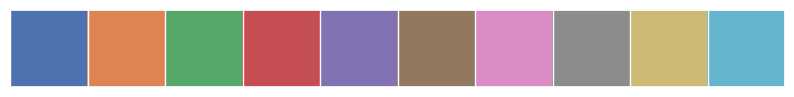

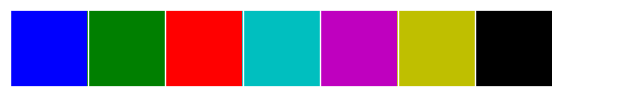

In [3]:
# set theme with color_code = False
sns.set_theme(palette='deep', color_codes=False)
# Current color palettes
current_palette = sns.color_palette()
sns.palplot(current_palette)
# single letter color codes stays
sns.palplot(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'])


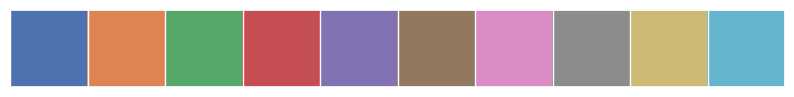

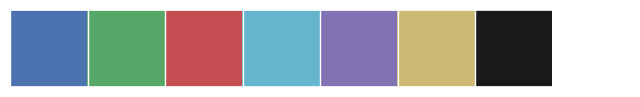

In [4]:
# set theme with color_code = True
sns.set_theme(palette='deep', color_codes=True)
# Current color palettes
current_palette = sns.color_palette()
sns.palplot(current_palette)
# single letter color codes remap
sns.palplot(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'])